# Classifying the Fashion-MNIST Dataset

Dataset source: [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)<br><br>

Fashion-MNIST is a set of 28x28 greyscale images of clothes (see below for examples of the images).

<img src='assets/fashion-mnist-sprite.png' width=500px><br>

In this notebook, I will build out and train a few simple neural networks and test their performance on the testing set of 10,000 images. Note that the helper file used to visualize images and the commands used to extract the training and testing data were provided as part of a Udacity exercise.

# Importing Libraries & Preparing Data

In [1]:
import torch
from torchvision import datasets, transforms
import helper
from torch import nn,optim
import time

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

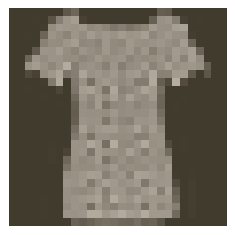

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Each image is 28x28 pixels, which is a total of 784. I will flatten the images into one line and feed batches of 64 images in one line (64x784 tensors) into the network. So, the input layer to the networks will have 784 nodes. Below are all the different architectures I tested.

V1 Model

In [3]:
# model = nn.Sequential(nn.Linear(784,196), # input layer to hidden layer 1
#                      nn.ReLU(),
#                      nn.Linear(196,98), # hidden layer 1 to hidden layer 2
#                      nn.ReLU(),
#                      nn.Linear(98,49), # hidden layer 2 to hidden layer 3
#                      nn.ReLU(),
#                      nn.Linear(49,10), # hidden layer 3 to output layer,
#                      nn.LogSoftmax(dim=1) # LogSoftmax used as probability output
#                      )

V2 Model

In [4]:
# model = nn.Sequential(nn.Linear(784,392), # input layer to hidden layer 1
#                      nn.ReLU(),
#                      nn.Linear(392,196), # hidden layer 1 to hidden layer 2
#                      nn.ReLU(),
#                      nn.Linear(196,98), # hidden layer 2 to hidden layer 3
#                      nn.ReLU(),
#                      nn.Linear(98,49), # hidden layer 3 to hidden layer 4
#                      nn.ReLU(),
#                      nn.Linear(49,10), # hidden layer 4 to output layer,
#                      nn.LogSoftmax(dim=1) # LogSoftmax used as probability output
#                      )

V3 Model

In [5]:
# model = nn.Sequential(nn.Linear(784,392), # input layer to hidden layer 1
#                      nn.ReLU(),
#                      nn.Linear(392,392), # hidden layer 1 to hidden layer 2
#                      nn.ReLU(),
#                      nn.Linear(392,196), # hidden layer 2 to hidden layer 3
#                      nn.ReLU(),
#                      nn.Linear(196,98), # hidden layer 3 to hidden layer 4
#                      nn.ReLU(),
#                      nn.Linear(98,10), # hidden layer 4 to output layer,
#                      nn.LogSoftmax(dim=1) # LogSoftmax used as probability output
#                      )

V4 Model

In [6]:
# model = nn.Sequential(nn.Linear(784,392), # input layer to hidden layer 1
#                      nn.ReLU(),
#                      nn.Linear(392,196), # hidden layer 1 to hidden layer 2
#                      nn.ReLU(),
#                      nn.Linear(196,98), # hidden layer 2 to hidden layer 3
#                      nn.ReLU(),
#                      nn.Linear(98,49), # hidden layer 3 to hidden layer 4
#                      nn.ReLU(),
#                      nn.Linear(49,25), # hidden layer 4 to hidden layer 5,
#                      nn.ReLU(),
#                      nn.Linear(25,10), # hidden layer 5 to output layer,
#                      nn.LogSoftmax(dim=1) # LogSoftmax used as probability output
#                      )

V5 Model

In [7]:
model = nn.Sequential(nn.Linear(784,392), # input layer to hidden layer 1
                     nn.ReLU(),
                     nn.Linear(392,392), # hidden layer 1 to hidden layer 2
                     nn.ReLU(),
                     nn.Linear(392,392), # hidden layer 2 to hidden layer 3
                     nn.ReLU(),
                     nn.Linear(392,392), # hidden layer 3 to hidden layer 4
                     nn.ReLU(),
                     nn.Linear(392,392), # hidden layer 4 to hidden layer 5,
                     nn.ReLU(),
                     nn.Linear(392,10), # hidden layer 5 to output layer,
                     nn.LogSoftmax(dim=1) # LogSoftmax used as probability output
                     )

# Training the network

In [13]:
# Using Negative log likelihood loss as the loss function for the network
criterion = nn.NLLLoss() 
optimizer = optim.SGD(model.parameters(),lr=.10,momentum=.10)

In [9]:
# TODO: Train the network here
epochs = 15
for e in range(epochs):
    running_loss = 0
    batch_count = 0
    # Timing each epoch
    start_epoch = time.time()
    for images,labels in trainloader:
        # Flattening images for input into the network
        image_flat = images.view(images.shape[0],-1)
        # Running the images through the network
        output = model(image_flat)
        # Calculating loss
        loss = criterion(output,labels)
        running_loss += loss
        # Calculating gradients
        loss.backward()
        # Updating weights
        optimizer.step()
        # Clearing gradients for next loop
        optimizer.zero_grad()
        batch_count += 1
    end_epoch = time.time()
    print(f'Epoch {e + 1} Complete')
    print(f'Total Average Loss: {running_loss/batch_count}')
    print(f'Time to Train: {end_epoch-start_epoch}\n')

Epoch 1 Complete
Total Average Loss: 0.8391014933586121
Time to Train: 15.515322208404541

Epoch 2 Complete
Total Average Loss: 0.43742603063583374
Time to Train: 15.528104066848755

Epoch 3 Complete
Total Average Loss: 0.37841010093688965
Time to Train: 15.834158897399902

Epoch 4 Complete
Total Average Loss: 0.3453957736492157
Time to Train: 15.405253887176514

Epoch 5 Complete
Total Average Loss: 0.31856799125671387
Time to Train: 15.058037996292114

Epoch 6 Complete
Total Average Loss: 0.30012473464012146
Time to Train: 14.81685996055603

Epoch 7 Complete
Total Average Loss: 0.2837115526199341
Time to Train: 15.112167119979858

Epoch 8 Complete
Total Average Loss: 0.2701813578605652
Time to Train: 14.279911994934082

Epoch 9 Complete
Total Average Loss: 0.2573709487915039
Time to Train: 14.160156011581421

Epoch 10 Complete
Total Average Loss: 0.2460995316505432
Time to Train: 14.510838985443115

Epoch 11 Complete
Total Average Loss: 0.2354026585817337
Time to Train: 15.33556628227

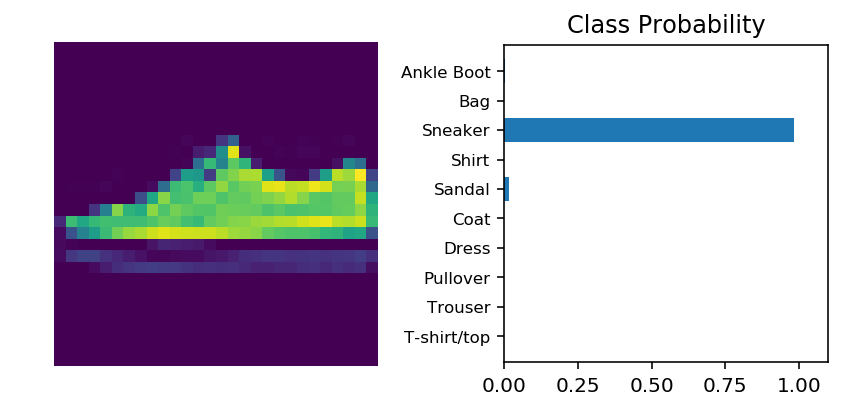

In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [11]:
# Scoring the Neural Network by accuracy
total_correct = 0
total_guesses = 0
for batch in testloader:
    images,labels = batch
    flattened_batch = images.view(images.shape[0],-1)
    # Running batch through model, then, taking their exponentials for the probabilities
    batch_probabilities = torch.exp(model(flattened_batch))
    # Taking the highest probability argument (the prediction)
    batch_predictions = batch_probabilities.argmax(dim=1)
    # Tracking how many were correct (matched the labels)
    batch_no_correct = sum(batch_predictions==labels).item()
    total_correct += batch_no_correct
    # Tracking total guesses
    total_guesses += len(labels)
print(f'Total Correct: {total_correct}')
print(f'Total Guesses: {total_guesses}')
print(f'Accuracy Score: {total_correct/total_guesses}')

Total Correct: 8805
Total Guesses: 10000
Accuracy Score: 0.8805


In [49]:
# Scoring the Neural Network by accuracy
with torch.no_grad():
    total_correct = 0
    total_guesses = 0
    for batch in testloader:
        images,labels = batch
        flattened_batch = images.view(images.shape[0],-1)
        # Running batch through model, then, taking their exponentials for the probabilities
        batch_probabilities = torch.exp(model(flattened_batch))
        # Taking the highest probability argument (the prediction)
        batch_predictions = batch_probabilities.argmax(dim=1)
        # Tracking how many were correct (matched the labels)
        batch_no_correct = sum(batch_predictions==labels).item()
        total_correct += batch_no_correct
        # Tracking total guesses
        total_guesses += len(labels)
    print(f'Total Correct: {total_correct}')
    print(f'Total Guesses: {total_guesses}')
    print(f'Accuracy Score: {total_correct/total_guesses}')

Total Correct: 8805
Total Guesses: 10000
Accuracy Score: 0.8805


In [55]:
torch.mean((batch_predictions==labels).type(torch.FloatTensor)).item()

1.0

**<center>Testing Results Table</center>**<br>
*<center>Note the kernel was reset for each test run</center>*

| Test Run | Accuracy | Epochs | Learning Rate | Momentum | Hidden Layer 1 | Hidden Layer 2 | Hidden Layer 3 | Hidden Layer 4 | Hidden Layer 5 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | .8749 | 10 | .10 | .05 | 196 | 98 | 49 | - | - |
| 2 | .8601 | 10 | .10 | .15 | 196 | 98 | 49 | - | - |
| 3 | .8749 | 10 | .10 | .10 | 196 | 98 | 49 | - | - |
| 4 | .8712 | 10 | .15 | .10 | 196 | 98 | 49 | - | - |
| 5 | .8865 | 50 | .10 | .10 | 196 | 98 | 49 | - | - |
| 6 | .8787 | 20 | .10 | .10 | 196 | 98 | 49 | - | - |
| 7 | .8893 | 15 | .10 | .10 | 392 | 196 | 98 | 49 | - |
| 8 | .8849 | 15 | .10 | .10 | 392 | 392 | 196 | 98 | - |
| 9 | .8888 | 15 | .10 | .10 | 392 | 196 | 98 | 49 | 25 |
| 10 | .8805 | 15 | .10 | .10 | 392 | 392 | 392 | 392 | 392 |

# Conclusion
The network performed the best when on test run 7 (88.93% accuracy), which was trained on the dataset for 15 epochs, and only included 3 hidden layers. I kept learning rate and momentum for the SGD optimizer on .10 and .10, respectively, for almost all test runs because those hyperparameters seemed to give me the best results after the first 4 test runs. After test run 7, I thought that performance would improve by adding additional nodes and layers, but it didn't improve the model's performance on the testing set per the results above. Surprisingly, the model performed slightly worse after I modified the existing hidden layers by adding more nodes (see test run 9 & 10). Finally, in test run 5, I was surpised to see that 50 epochs of training didn't affect performance as much as it did when comparing it to test runs 3 & 6. It appears that model performance tapers off after 10 or so epochs. Any more than 20 would just take an inordinate amount of time for minimal performance improvement.

If I continued experimenting, I would tweak the following hyperparameters:
- Activation functions like sigmoid or hyperbolic tangent instead of ReLU
- More Layers
- Different node patterns (i.e. increasing in width rather than decreasing in width)
- Different optimizers